# Hands-on 6

### CS2545 - Data Science ###
### Winter, 2023 ###
### UNB, Fredericton ###

Please complete the following and submit this notebook (filename: handson6-**lastname**-**firstname**.ipynb) to D2L by **11:59pm, Thu, April 6th 2023**.
</br>
</br>
</br>

**Q1.** Download *files.zip*  from D2L and unzip it. The data file *heartdev.csv* contains observations regarding several clinical features for predicting heart disease events. 

Note that the meaning of some of the column labels are specified below: <br>
RestingBP - resting blood pressure <br>
Cholesterol - serum cholesterol <br>
FastingBS - fasting blood sugar <br>
RestingECG - resting electrocardiogram results <br>
MaxHR - maximum heart rate achieved <br>
ExerciseAngina - exercise induced angina <br>
ST_Slope - the slope of the peak exercise ST segment


Filter out (i.e. remove) the records with cholesterol level 0 and then show the first 5 records. (**2 points**)

In [1]:
import thinkstats2
import thinkplot
import pandas as pd


heart_df = pd.read_csv('heartdev.csv', delimiter=',')
print(heart_df)
#heart_df2= heart_df.loc['Cholesterol']==0
heart_df2= heart_df[heart_df['Cholesterol'] != 0] 

heart_df2.head(5)

# your code below



     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Q1.1**  Plot the Probability Mass Functions (PMF) of the cholesterol levels for both males and females who are **60 years or above**. So, there will be 2 PMF plots in a single figure corresponding to the males and females. (**4 points**)

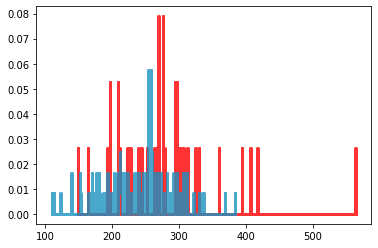

In [7]:
# your code below
pplChol=  heart_df2[heart_df2['Age'] > 60] 
pplCholW=  pplChol[pplChol['Sex']=='F'] 

pplCholM=  pplChol[pplChol['Sex']=='M'] 

#pplCholM= 
#print(pplChol)

cholLvlF=pplCholW['Cholesterol']
cholLvlM=pplCholM['Cholesterol']
#x=int(cholLvl)
#print(cholLvl)



pmfF=thinkstats2.Pmf(cholLvlF)
pmfM=thinkstats2.Pmf(cholLvlM)

thinkplot.Pmf(pmfF,color="red")
thinkplot.Pmf(pmfM)


**Q1.2**  Plot the Cummulative Distribution Functions (CDF) of the cholesterol levels for both males and females who are **60 years or above**. So, there will be 2 CDF plots in a single figure corresponding to the males and females. (**4 points**)

{'xscale': 'linear', 'yscale': 'linear'}

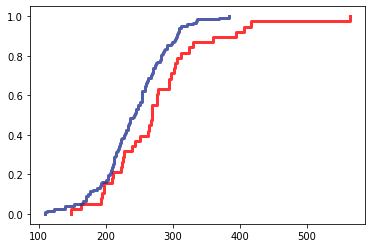

In [8]:
# your code below

#cdfF=thinkstats2.Cdf(pplCholW.Cholesterol, label="F")
cdfF=thinkstats2.Cdf(pplCholW.Cholesterol)
cdfM=thinkstats2.Cdf(pplCholM.Cholesterol)


thinkplot.PrePlot(2)
#thinkplot.Config(title="CDF of Cholesterol Lvls in PPl over 60")
#thinkplot.Cdfs([cdfF,cdfM])
thinkplot.Cdf(cdfF,color='red')
thinkplot.Cdf(cdfM)


## **Q1.3** What do you conclude from Q1.1 and Q1.2? (**4 points**)


In [ ]:
# your answer below

I can conclude from the pmdf and cdf that woman tend to have higher
cholestrol than men.


**Q2.**  Plot a scatter plot of the **cholesterol level** (on x-axis) of people over 60 years of age regardless of the gender and their corresponding maximum heart rate, i.e., **MaxHR** (on y-axis). (**4 points**)


Then calculate the Pearson’s Correlation Coefficient. Tips: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
(**2 points**)

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.028344    -0.128249   0.139672 -0.129102 -0.015093   
RestingBP     0.028344   1.000000    -0.033807   0.279504  0.052569  0.088283   
Cholesterol  -0.128249  -0.033807     1.000000  -0.010095  0.200391 -0.068944   
FastingBS     0.139672   0.279504    -0.010095   1.000000 -0.131136 -0.051008   
MaxHR        -0.129102   0.052569     0.200391  -0.131136  1.000000 -0.075234   
Oldpeak      -0.015093   0.088283    -0.068944  -0.051008 -0.075234  1.000000   
HeartDisease  0.004359   0.075717    -0.090256   0.089550 -0.258817  0.391824   

              HeartDisease  
Age               0.004359  
RestingBP         0.075717  
Cholesterol      -0.090256  
FastingBS         0.089550  
MaxHR            -0.258817  
Oldpeak           0.391824  
HeartDisease      1.000000  


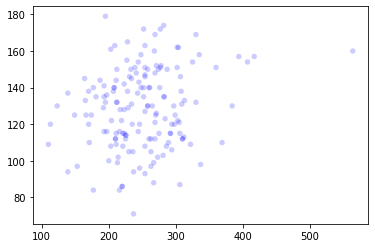

In [14]:
# your code below
cholLvlAll=pplChol['Cholesterol']
hr=pplChol['MaxHR']
thinkplot.Scatter(cholLvlAll,hr)

correlation= pplChol.corr(method='pearson')
print(correlation)